<a href="https://colab.research.google.com/github/hemasampath15/cancer-classfication/blob/main/AI_CASESTUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving mall_data.csv.csv to mall_data.csv (1).csv


{'mall_data.csv (1).csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,

In [2]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('mall_data.csv.csv')

# Check the first few rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Convert 'Gender' from categorical to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Preview the dataset again to confirm the changes
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [4]:
# Select the features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Features

# Create a binary target label (0 for low spenders, 1 for high spenders)
# We'll use the median of the 'Spending Score' to classify as low/high spender
y = (df['Spending Score (1-100)'] > df['Spending Score (1-100)'].median()).astype(int)

# Preview the features and labels
print(X.head())
print(y.head())


   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
0    0
1    1
2    0
3    1
4    0
Name: Spending Score (1-100), dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

# Check for missing values in the dataset
if df.isnull().values.any():
    print("Warning: Missing values detected in the dataset.")
    print(df.isnull().sum())  # Display where the missing values are
    # Optionally, drop or fill missing values before proceeding
    # df = df.dropna()  # or df = df.fillna(method='ffill')

# Split the data into training (70%) and testing sets (30%)
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Check the size of the training and testing sets
    print("Training set size:", X_train.shape)
    print("Testing set size:", X_test.shape)
except ValueError as e:
    print("Error during train-test split:", e)
    print("Possible causes could be mismatch in data dimensions or presence of NaN values.")


Training set size: (140, 3)
Testing set size: (60, 3)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # Example for RandomForest

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# If you want to try a different model (e.g., RandomForest), uncomment the following lines:
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# Check if the model is successfully trained by printing the model parameters
print("Model training completed.")
print("Trained model:", model)


Model training completed.
Trained model: LogisticRegression(random_state=42)


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report (precision, recall, F1-score for each class)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.93      1.00      0.97        28

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
[[30  2]
 [ 0 28]]


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

# Calculate accuracy of the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Model Accuracy: 100.00%


In [9]:
import joblib

# Save the best model to a file
joblib_file = "best_random_forest_model.pkl"
joblib.dump(best_model, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to best_random_forest_model.pkl


In [10]:
# Load the model from the file
loaded_model = joblib.load(joblib_file)

# Example: Making predictions with the loaded model
example_data = X_test[:5]  # Use the first 5 instances from the test set as an example
predictions = loaded_model.predict(example_data)

print("Predictions for example data:", predictions)


Predictions for example data: [1 1 0 0 0]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[32  0]
 [ 0 28]]


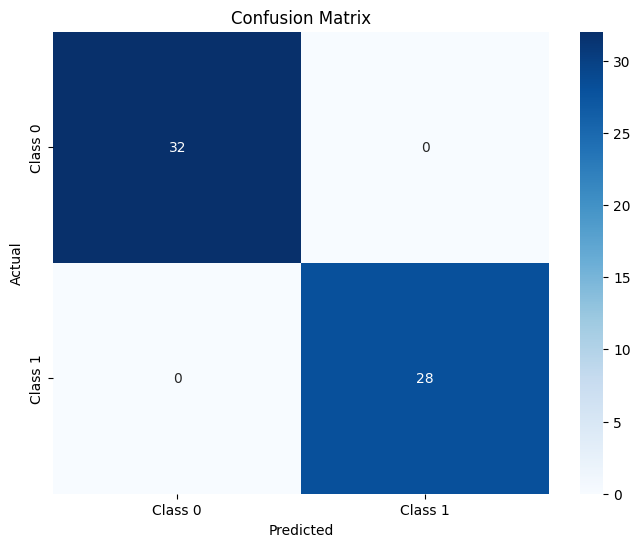

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Set up the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)
# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Compute and display the classification report for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance
import eli5

# Load your dataset (replace this with your actual data loading step)
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# Example dataset (you can replace this with your own data)
# Generate dummy data for illustration
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=10, random_state=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = PermutationImportance(model, random_state=1).fit(X_test, y_test)

# Display the feature importance
eli5.show_weights(perm_importance, feature_names=[f'feature_{i}' for i in range(X.shape[1])])


Weight,Feature
0.4400 ± 0.2227,feature_6
0.0300 ± 0.0490,feature_3
0.0200 ± 0.0490,feature_7
0 ± 0.0000,feature_9
0 ± 0.0000,feature_8
0 ± 0.0000,feature_5
0 ± 0.0000,feature_4
0 ± 0.0000,feature_2
0 ± 0.0000,feature_1
0 ± 0.0000,feature_0
